In [23]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras as ks



In [24]:
dataset = pd.read_csv('sensor.csv')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [60]:
counts = df['Is_Malicious'].value_counts()
counts_filtered = counts.loc[[0, 1]]
print(counts_filtered)

Is_Malicious
0    9513
1     487
Name: count, dtype: int64


In [25]:
# Find NAN
nan_df = dataset[dataset.isna().any(axis=1)]
display(nan_df.head())

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious


In [26]:
dataset = dataset.dropna(how='all')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
# Set aside the column containing IP addresses
ip_address_column = dataset['IP_Address']
dataset = dataset.drop(columns=['IP_Address'])
# Convert datetime columns to numeric representation 
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Timestamp'] = dataset['Timestamp'].astype('int64') // 10**9  # Convert to UNIX timestamp (seconds)
scaler = MinMaxScaler()
scaler.fit(dataset)
normalized_dataset = scaler.transform(dataset)
normalized_dataset_df = pd.DataFrame(normalized_dataset, columns=dataset.columns)
normalized_dataset_df['IP_Address'] = ip_address_column
normalized_dataset_df.head()



,Node_ID,Timestamp,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,Energy_Consumption_Rate,...,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious,IP_Address
0,0.0000,0.000000,0.370660,0.421887,0.483303,0.726891,0.387964,0.654562,0.588587,0.210505,...,0.438084,0.364206,0.538487,0.360808,0.258052,0.296612,0.399257,0.362036,0.0,192.168.119.138
1,0.0001,0.000004,0.446889,0.240218,0.660597,0.432764,0.261806,0.621356,0.403047,0.239503,...,0.290589,0.252353,0.376536,0.358555,0.157552,0.390018,0.505119,0.606860,0.0,192.168.225.56
2,0.0002,0.000008,0.188397,0.224170,0.522014,0.305064,0.380438,0.457839,0.492789,0.246322,...,0.286667,0.230932,0.500502,0.275840,0.081752,0.541996,0.451933,0.641372,0.0,192.168.187.210
3,0.0003,0.000011,0.244653,0.318063,0.372078,0.354078,0.351013,0.567243,0.516964,0.160200,...,0.407125,0.154018,0.397869,0.180935,0.191066,0.521447,0.574054,0.679332,0.0,192.168.78.245
4,0.0004,0.000015,0.250453,0.179776,0.780017,0.681119,0.440298,0.662715,0.605663,0.290894,...,0.431003,0.328383,0.272133,0.222654,0.131454,0.372950,0.344322,0.326941,0.0,192.168.233.229


In [28]:
df = pd.DataFrame(dataset)
#dataset['Timestamp'] = pd.to_numeric(dataset['Timestamp'])
#dataset['IP_Address'] = pd.to_numeric(dataset['IP_Address'])
dataset['Packet_Rate'] = pd.to_numeric(dataset['Packet_Rate'])
dataset['Packet_Drop_Rate'] = pd.to_numeric(dataset['Packet_Drop_Rate'])
dataset['Packet_Duplication_Rate'] = pd.to_numeric(dataset['Packet_Duplication_Rate'])
dataset['Signal_Strength'] = pd.to_numeric(dataset['Signal_Strength'])
dataset['SNR'] = pd.to_numeric(dataset['SNR'])
dataset['Battery_Level'] = pd.to_numeric(dataset['Battery_Level'])
dataset['Energy_Consumption_Rate'] = pd.to_numeric(dataset['Energy_Consumption_Rate'])
dataset['Number_of_Neighbors'] = pd.to_numeric(dataset['Number_of_Neighbors'])
dataset['Route_Request_Frequency'] = pd.to_numeric(dataset['Route_Request_Frequency'])
dataset['Route_Reply_Frequency'] = pd.to_numeric(dataset['Route_Reply_Frequency'])
dataset['Data_Transmission_Frequency'] = pd.to_numeric(dataset['Data_Transmission_Frequency'])
dataset['Data_Reception_Frequency'] = pd.to_numeric(dataset['Data_Reception_Frequency'])
dataset['Error_Rate'] = pd.to_numeric(dataset['Error_Rate'])
dataset['CPU_Usage'] = pd.to_numeric(dataset['CPU_Usage'])
dataset['Memory_Usage'] = pd.to_numeric(dataset['Memory_Usage'])
dataset['Bandwidth'] = pd.to_numeric(dataset['Bandwidth'])

In [29]:
#Data Processisng
from sklearn.model_selection import train_test_split
#x = dataset.drop(['Is_Malicious','Timestamp','IP_Address'],axis=1)
x = dataset.drop(['Is_Malicious'],axis=1)
y = dataset['Is_Malicious']


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)

In [31]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test[0]

array([ 0.18818412,  0.01001195, -0.38605153,  0.48853702, -1.79368308,
        0.8428353 , -0.47404561,  0.6869097 , -0.19042551, -0.12992398,
        0.2681531 , -0.26122638, -1.26247391,  0.57656176,  0.90770881,
       -0.2691141 , -1.60603548, -0.74264959,  2.17115784])

array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>],
       [<Axes: title={'center': 'Packet_Duplication_Rate'}>,
        <Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>],
       [<Axes: title={'center': 'Battery_Level'}>,
        <Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>],
       [<Axes: title={'center': 'Route_Reply_Frequency'}>,
        <Axes: title={'center': 'Data_Transmission_Frequency'}>,
        <Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>],
       [<Axes: title={'center': 'CPU_Usage'}>,
        <Axes: title={'center': 'Memory_Usage'}>,
        <Axes: title={'center': 

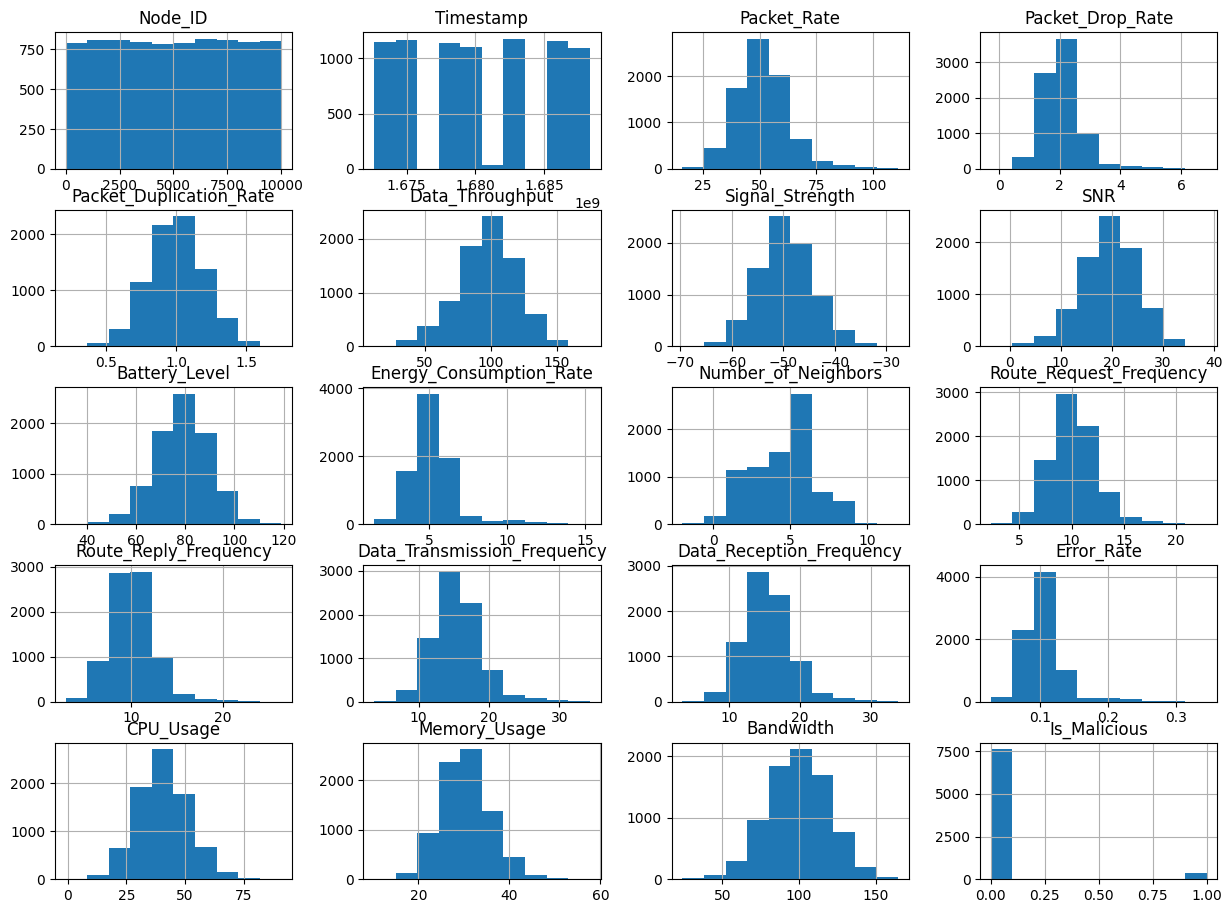

In [38]:
train_data.hist(figsize=(15,11))

<Axes: >

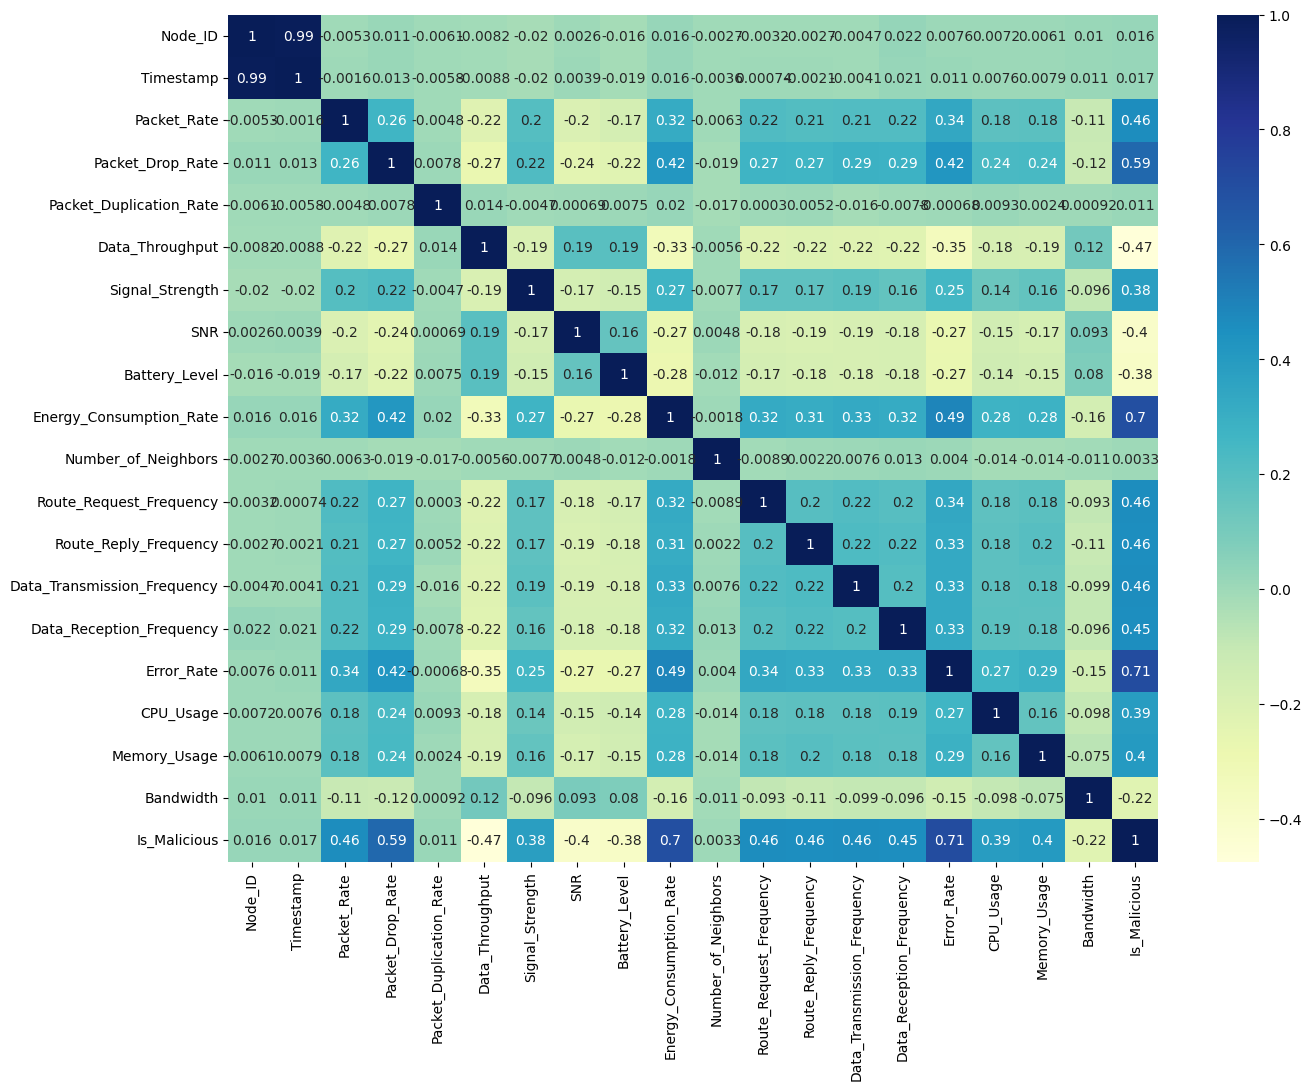

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,11))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [34]:
from scipy.stats import pearsonr
# Select two columns from the dataset to calculate correlation
output_column = 'Is_Malicious'
correlation_results = {}
for column in dataset.columns:
    if column != output_column:
        # Check for NaN values and handle them
        mask = ~np.isnan(dataset[column]) & ~np.isnan(dataset[output_column])
        correlation_coefficient, _ = pearsonr(dataset[column][mask], dataset[output_column][mask])
        correlation_results[column] = correlation_coefficient

# Sort the results by correlation coefficient in descending order
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

# Print the results
for column, correlation_coefficient in sorted_correlation_results:
    print(f"Correlation between {column} and {output_column}: {correlation_coefficient}")

Correlation between Error_Rate and Is_Malicious: 0.7105457053586417
Correlation between Energy_Consumption_Rate and Is_Malicious: 0.7025543933388565
Correlation between Packet_Drop_Rate and Is_Malicious: 0.6036342936951669
Correlation between Packet_Rate and Is_Malicious: 0.4670940481992473
Correlation between Data_Transmission_Frequency and Is_Malicious: 0.4637703911830785
Correlation between Data_Reception_Frequency and Is_Malicious: 0.4597602320057451
Correlation between Route_Reply_Frequency and Is_Malicious: 0.45688211390726186
Correlation between Route_Request_Frequency and Is_Malicious: 0.45573572202847984
Correlation between Memory_Usage and Is_Malicious: 0.4026946152750799
Correlation between CPU_Usage and Is_Malicious: 0.40156877480806863
Correlation between Signal_Strength and Is_Malicious: 0.38386363780343946
Correlation between Timestamp and Is_Malicious: 0.010610639141888294
Correlation between Packet_Duplication_Rate and Is_Malicious: 0.010230354722061293
Correlation bet

In [35]:
x = dataset.drop(['Number_of_Neighbors','Node_ID','Packet_Duplication_Rate','Timestamp'],axis=1)

In [80]:
# LinearRegression
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming train_data, x_test are defined earlier
x_train, y_train = train_data.drop(['Is_Malicious'], axis=1), train_data['Is_Malicious']

# Training the model
reg = LinearRegression().fit(x_train, y_train)
x_test, y_test = test_data.drop(['Is_Malicious'], axis = 1), test_data['Is_Malicious']
# Predicting on test data
test_predictions = reg.predict(x_test)

# Rounding predictions to 0 or 1
rounded_predictions = (test_predictions >= 0.5).astype(int)

# Counting the occurrences of 0 and 1
value_counts = pd.Series(rounded_predictions).value_counts()
print(value_counts)


0    1908
1      92
Name: count, dtype: int64


In [78]:
reg.score(x_test,y_test)

0.8360179539862667

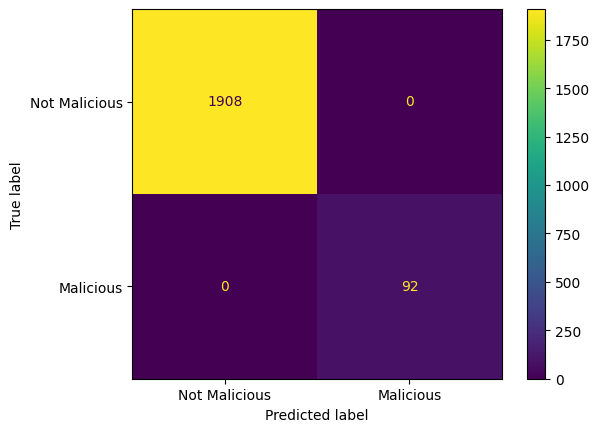

In [81]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,rounded_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
#this graph shows thas the predection was 100% true

In [76]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s =""" 
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)

 
True Negatives: 1908
False Positives: 0
False Negatives: 0
True Positives: 92



In [82]:
#accuracy
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 1.0'

In [86]:
#recall(True  Positive Rate)
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))


'True Positive Rate: 1.0'

In [87]:
#False  Negative Rate
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

In [88]:
#Precision  =  Positive   Predictive   Value
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 1.0'

In [89]:
#Negative  Predictive Value
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

In [93]:
#Specificity ( True Negative Rate)
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"True Negative Rate: {0}".format(tnr(tn, fp, fn, tp))

'True Negative Rate: 1.0'

In [94]:
#Balanced  Accuracy
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 1.0'

In [95]:
#F1
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))


'F1 Score: 1.0'

In [103]:
probabilities = reg.predict(x_test)
# Normalize predictions to be between 0 and 1
probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min())
# Get predictions using normal threshold of 0.5
pd.value_counts(probabilities > 0.5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12136\2223053102.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(probabilities > 0.5)


False    1908
True       92
Name: count, dtype: int64

In [46]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
forest.score(x_test,y_test)

0.9949013307811503

In [48]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_test: (2000, 19)
Shape of y_test: (2000,)


In [49]:
#ANN
import keras
from keras import layers

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(19,), activation='relu'),  # Note the comma after 19 to make it a tuple
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]) 

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 
x = np.column_stack((x_train, y_train))
y = y_train.values
 
model.fit(x_train, y_train, epochs=10, batch_size=8)
x = np.column_stack((x_test, y_test))
y = y_test
model.evaluate(x=x_test, y=y_test, batch_size=8)


Epoch 1/10
1000/1000 [==============================] - 24s 16ms/step - loss: 2243399.5000 - accuracy: 0.9095
Epoch 2/10
1000/1000 [==============================] - 32s 32ms/step - loss: 1134335.3750 - accuracy: 0.9072
Epoch 3/10
1000/1000 [==============================] - 11s 11ms/step - loss: 795927.3125 - accuracy: 0.9100
Epoch 4/10
1000/1000 [==============================] - 14s 14ms/step - loss: 553645.5625 - accuracy: 0.9115
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 387704.5000 - accuracy: 0.9090
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 257490.5156 - accuracy: 0.9080
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 182899.6406 - accuracy: 0.9097
Epoch 8/10
1000/1000 [==============================] - 11s 11ms/step - loss: 98470.1484 - accuracy: 0.9107
Epoch 9/10
1000/1000 [==============================] - 11s 11ms/step - loss: 53882.7344 - accuracy: 0.9103
Epoch 10/10
250/250 [==

[29648.8046875, 0.9539999961853027]

In [104]:
#Cross-Validation
from sklearn.model_selection import GridSearchCV
param_grid = {
   "n_estimators":[100,200,300],
   "min_samples_split":[2,4],
   "n_n":[3,10,30],
   "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test,y_test)

0.9924373897707232